# Regression Analysis


In this assignment you will train a model for a regression problem based on linear regression with polynomial feature extension. You are not allowed to use sklearn or any existing python libraries that implements Linear or Polynomial Regresssion in any form. You are expected to write the source code by yourselves, including the gradient descent algorithm. 


## Dataset
You are given a 1D dataset and the ground truth targets for the regression in train.csv file. You are also provided with test.csv file for the model evaluations. Do not use any data from the test data in your model trainings. 

## Requirements
Include all the source codes in the following cells; make sure that the codes are sufficiently documented in each section. After training your model, provide regression plots for the train and test data (separately) as well. Report your MSE and average Root Mean Square Error that you obtain using the test data in the Report Section (below). Also, provide all the hyperparameters and their values following the source codes in seperate cells.

Connect gdrive for train/test dataset:

In [1]:
from google.colab import drive # import lib
drive.mount("/content/gdrive") # mount gdrive

Mounted at /content/gdrive


Import libraries:

In [8]:
import numpy as np # for np array ops
import matplotlib.pyplot as plt # for visualization purposes
from pandas import * # for reading and parsing .csv files
import random # for shuffling dataset at each iteration

Read .csv from gdrive and parse "x" and "t" into two lists:

Length of Training Dataset:  150
Training data visualized (x axis: X, y axis: T:
Length of Test Dataset:  100
Test dataset visualized (x axis: X, y axis: T:


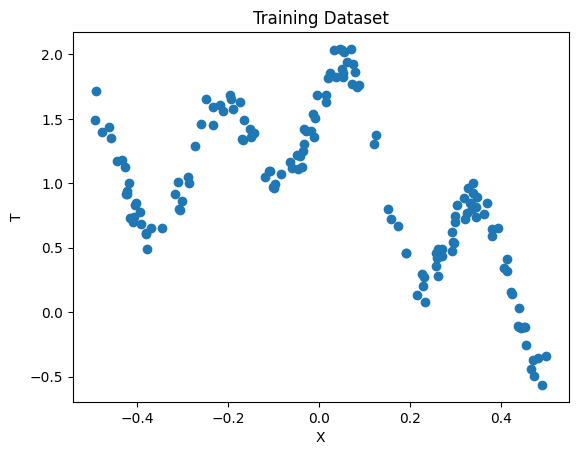

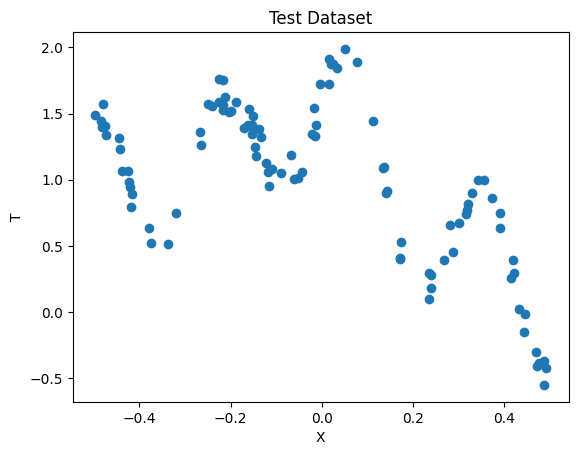

In [10]:
sTrainAdd = "/content/gdrive/MyDrive/cmp712/hw1/train.csv" # address of train.csv on gdriveg
sTestAdd  = "/content/gdrive/MyDrive/cmp712/hw1/test.csv" # address of test.csv on gdriveg
data = read_csv(sTrainAdd) # read train.csv
X = data['x'] # assign training dataset arguments into X
T = data['t'] # assign training dataset values into T
TRAIN_DATASET_LENGTH = len(X) # get length of dataset
data_test = read_csv(sTestAdd) # read train.csv
X_test = data_test['x'] # assign test dataset arguments into X_test
T_test = data_test['t'] # assign test dataset values into T_test
TEST_DATASET_LENGTH = len(X_test) # get length of dataset
print('Length of Training Dataset: ', TRAIN_DATASET_LENGTH)
print('Training data visualized (x axis: X, y axis: T:')
plt.figure()
plt.title("Training Dataset")
plt.xlabel("X")
plt.ylabel("T")
plt.scatter(X, T) # check if data is ok
print('Length of Test Dataset: ', TEST_DATASET_LENGTH)
print('Test dataset visualized (x axis: X, y axis: T:')
plt.figure()
plt.title("Test Dataset")
plt.xlabel("X")
plt.ylabel("T")
plt.scatter(X_test, T_test) # check if data is ok

# Trainer and Helper Methods

*calcLossPartialDeriv:* Generic method to calculate partial derivatives of Mean Squared Error (of loss function) wrt to polynomial parameters (Note that this method is built generic in order to ease the process of testing polynomials with different order):

In [11]:
def calcLossPartialDeriv(T_truth, T_Pred, x, nOrder):
  res = (-2) * (T_truth - T_Pred) * x**nOrder
  return res

*calcPoly:* Generic method to calculate polynomials of different orders:

In [12]:
def calcPoly(x, params):
  sum = 0
  nOrder = len(params) - 1
  for n in range(0, len(params)):
    sum += params[n] * np.power(x, nOrder - n)
  return sum

*calcLoss:* Method to calculate loss as Mean Squared Error (MSE):

In [14]:
def calcLoss(truth, pred, vParams, nReg):
  loss = 1/truth.size * np.sum(np.power(truth - pred, 2)) + nReg * sum(vParams)/len(vParams)
  return loss

*trainer:* Trainer method with following properties:


*   Stochastic online update with gradient descent is used.
*   Dataset is shuffled at each iteration



In [17]:
def trainer(X, T, nLearningRate, nPolyOrder, nIterLim, nReg):
  vLoss_training = np.zeros(nIterLim) # vector of training MSE losses
  vLoss_test = np.zeros(nIterLim) # vector of test MSE losses
  vPolyParams = np.zeros(nPolyOrder + 1) # Polynomial constants stored in np array
  vPolyParams = np.random.rand(nPolyOrder + 1)
  vLossPartialDerivs = np.zeros(nPolyOrder + 1) # Partial derivatives of loss function stored in np array
  nIter = 0 # Iteration counter
  while (nIter<nIterLim): # train until loss decreases to a certain value or number of iterations reached
    temp = list(zip(X, T))
    random.shuffle(temp)
    X, T = zip(*temp)
    X, T = np.array(X), np.array(T)
    for idx in range(TRAIN_DATASET_LENGTH):
      T_Pred = calcPoly(X[idx], vPolyParams) # calculate predictor's values
      for i in range(0, nPolyOrder+1): # calculate derivatives and update parameters
        vLossPartialDerivs[i] = calcLossPartialDeriv(T[idx], T_Pred, X[idx], nPolyOrder-i) # calculate partial derivatives
      vPolyParams = vPolyParams - nLearningRate * vLossPartialDerivs
    vLoss_training = calcLoss(T, calcPoly(X, vPolyParams), vPolyParams, 0)
    vLoss_test = calcLoss(T_test, calcPoly(X_test, vPolyParams), vPolyParams, 0)
    nIter = nIter + 1
    if(nIter%(nIterLim * 0.05)==0): # show progress at each %5 interval
        print("progress: %", int(nIter/nIterLim * 100), "Training Loss=", vLoss_training, "Params=", vPolyParams)
  return vPolyParams, vLoss_training, vLoss_test

# Report
Write your test results and utilized hyperparameter parameter values in this section. Briefly discuss how your algorithm works; and why it works as it is.

Trainer wrapper:

In [18]:
# Hyperparameters:
LEARNING_RATE = 0.006
REGULARIZATION = 0 #0.2
POLY_ORDER = 9
LIM_ITER = 2000000
vPolyParams, vLoss_training, vLoss_test = trainer(X, T, LEARNING_RATE, POLY_ORDER, LIM_ITER, REGULARIZATION)
print(vPolyParams)

progress: % 5 Training Loss= 0.11593198717493586 Params= [ -2.35241306   1.09439106  -9.75683697   5.14399121 -21.53390987
  22.68696011   0.79227738  -9.6952985   -0.46402012   1.50474215]
progress: % 10 Training Loss= 0.11191890601816232 Params= [-4.87512436e+00 -3.57771130e-02 -1.78062392e+01  2.43263992e+00
 -3.77492555e+01  2.46191070e+01  5.85888639e+00 -9.94328175e+00
 -7.59754249e-01  1.49895210e+00]
progress: % 15 Training Loss= 0.10921973262729251 Params= [ -6.9267885   -1.18892788 -24.32360615  -0.39656608 -50.36312441
  26.108338     9.83451173 -10.10094425  -0.99022515   1.50612487]
progress: % 20 Training Loss= 0.10755264818176387 Params= [ -8.60874338  -2.33185105 -29.63890188  -3.22165749 -60.1533252
  27.49822138  12.93923891 -10.23999602  -1.1715652    1.51360389]
progress: % 25 Training Loss= 0.10649168222330689 Params= [-10.00086838  -3.46085518 -34.01223559  -6.03103434 -67.73205744
  28.80967757  15.36124324 -10.37171133  -1.31241091   1.51331091]
progress: % 30 T

Visualize Results:

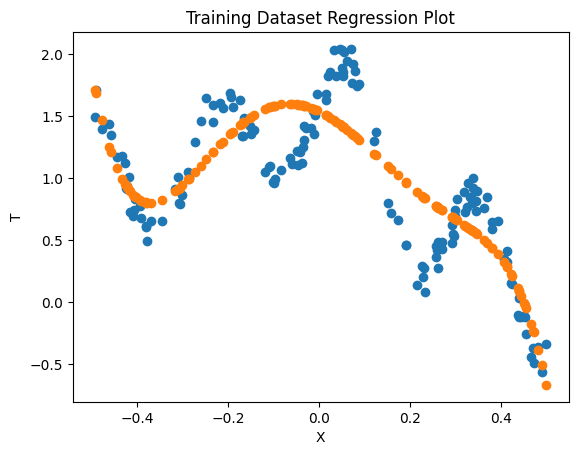

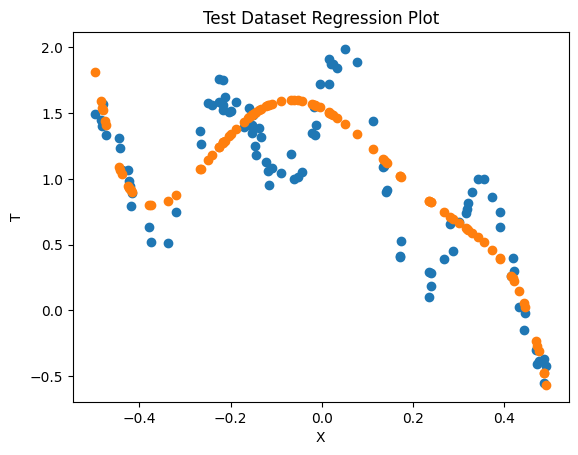

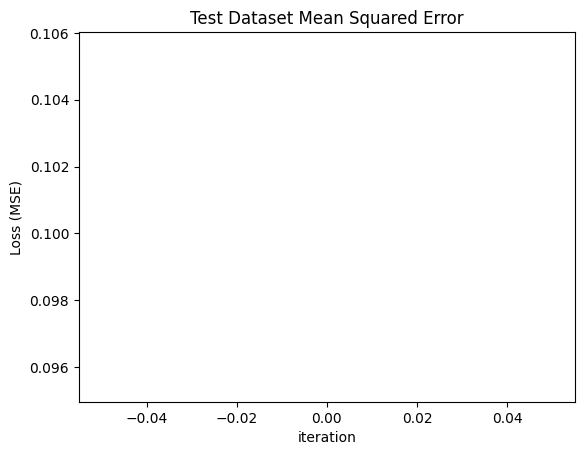

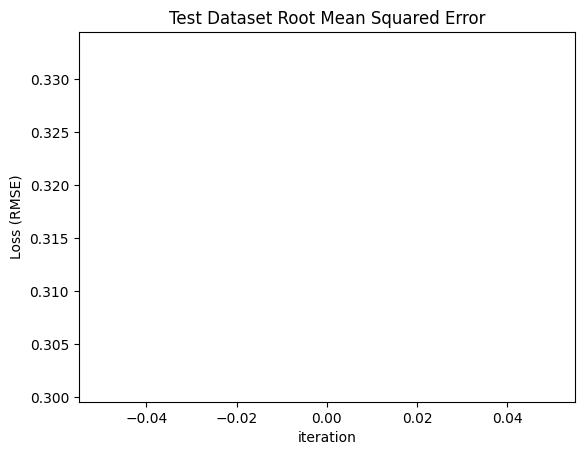

In [19]:
vIdx = sorted(range(len(X)), key=lambda k: X[k])
X = X[vIdx]
T_Pred = calcPoly(X, vPolyParams)
T_Pred = T_Pred[vIdx]
T = T[vIdx]
vIdx_test = sorted(range(len(X_test)), key=lambda k: X_test[k])
X_test = X_test[vIdx_test]
T_Pred_test = calcPoly(X_test, vPolyParams)
T_Pred_test = T_Pred_test[vIdx_test]
T_test = T_test[vIdx_test]
plt.figure()
plt.title("Training Dataset Regression Plot")
plt.xlabel("X")
plt.ylabel("T")
plt.scatter(X, T) 
plt.scatter(X, T_Pred)
plt.figure()
plt.title("Test Dataset Regression Plot")
plt.xlabel("X")
plt.ylabel("T")
plt.scatter(X_test, T_test)
plt.scatter(X_test, T_Pred_test)
plt.figure()
plt.title("Test Dataset Mean Squared Error")
plt.xlabel("iteration")
plt.ylabel("Loss (MSE)")
plt.plot(vLoss_test)
plt.figure()
plt.title("Test Dataset Root Mean Squared Error")
plt.xlabel("iteration")
plt.ylabel("Loss (RMSE)")
plt.plot(np.sqrt(vLoss_test))

# Report
Write your test results and utilized hyperparameter parameter values in this section. Briefly discuss how your algorithm works; and why it works as it is.